In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns
import torch
from sklearn.decomposition import PCA

import pyro
import pyro.distributions as dist
from pyro.contrib.autoguide import AutoDiagonalNormal, AutoMultivariateNormal
from pyro.infer import MCMC, NUTS, HMC, SVI, Trace_ELBO
from pyro.optim import Adam, ClippedAdam
import itertools
palette = itertools.cycle(sns.color_palette())

from func import get_data

# fix random generator seed (for reproducibility of results)
#np.random.seed(42)

# matplotlib style options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

# Read the CSV file into a pandas DataFrame and display the first few rows
X_train,y_train,X_test,y_test,age = get_data(True,False)


print("Training Dataset size:", len(X_train))
print("Test Dataset size:", len(X_test))

print('Training data shape: ',X_train.shape)
print('Test data shape: ',X_test.shape)

ind_train = age[0].astype("int")
ind_test = age[1].astype("int")

#________________________________________________

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Training Dataset size: 1025
Test Dataset size: 303
Training data shape:  (1025, 13)
Test data shape:  (303, 13)


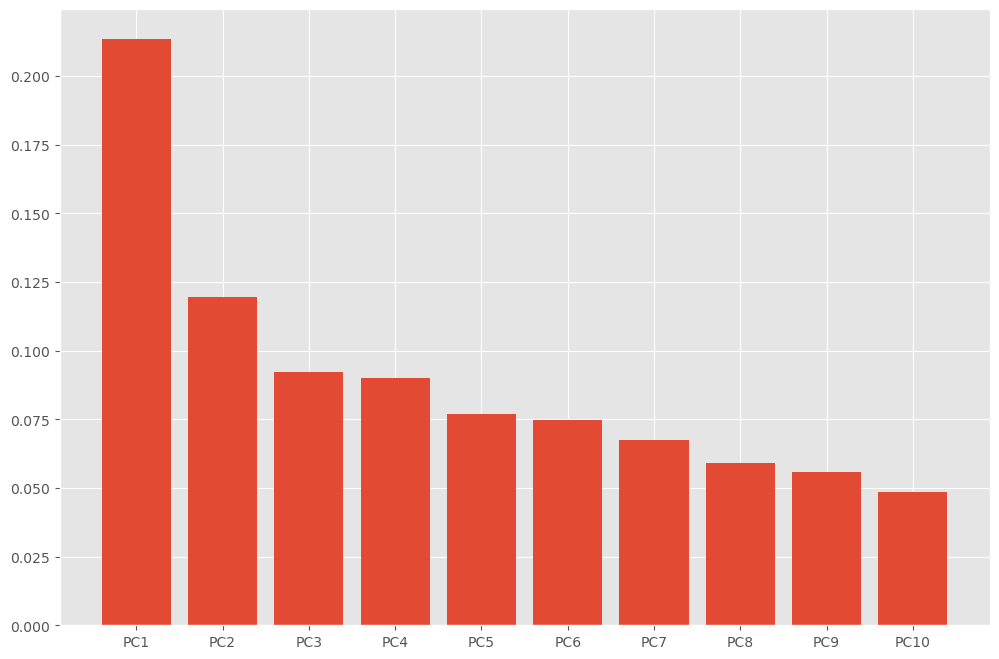

[0.30957429 0.07807315 0.28561649 0.17876028 0.12798537 0.08071345
 0.12949038 0.41696971 0.36386912 0.42178071 0.38010767 0.26533438
 0.21407015]
 
[0.3982859  0.37907583 0.27494742 0.43890862 0.36981882 0.32147582
 0.24476033 0.09383014 0.25861347 0.07052708 0.06479208 0.10585787
 0.18261906]


In [11]:
#print(X_train)

pca = PCA(n_components=10,svd_solver='full')
pca.fit_transform(X_train)

if True:
    pc = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"]
    plt.bar(pc,pca.explained_variance_ratio_)
    plt.show()
else:
    print(pca.explained_variance_ratio_)


print(abs( pca.components_ )[0,:])
print(' ')
print(abs( pca.components_ )[1,:])

